In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import fitsio
import astropy.table as astTable
import lsst.afw.image as afwImage
import glob
import os
from astropy.visualization import ZScaleInterval

In [63]:
fname = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal_v2/flux_err.fits"
dd = fitsio.read(fname)
full = fitsio.read("/gpfs02/work/xiangchong.li/work/hsc_data/s23b/tracts_fdfc_v1_final.fits")

In [68]:
msk = (full["ra"] > 152) & (full["dec"] < 154) & (full["dec"] >4.1) & (full["dec"] <5.1)
full2 = full[msk]
dd2 = dd[msk]

dd3 = dd[full["field"]=="spring1"]
full3 = full[full["field"]=="spring1"]

(array([ 7., 21., 19., 26., 29., 49., 54., 62., 53., 86., 93., 90., 70.,
        62., 75., 74., 73., 77., 73., 67., 88., 95., 64., 79., 89., 55.,
        42., 46., 46., 42., 29., 24., 15., 18., 19., 17., 11., 13.,  5.,
         4.,  2.,  1.,  3.,  0.,  2.,  0.,  0.,  1.,  0.,  2.]),
 array([0.53155102, 0.54474402, 0.55793701, 0.57113001, 0.58432301,
        0.59751601, 0.610709  , 0.623902  , 0.637095  , 0.650288  ,
        0.66348099, 0.67667399, 0.68986699, 0.70305998, 0.71625298,
        0.72944598, 0.74263898, 0.75583197, 0.76902497, 0.78221797,
        0.79541096, 0.80860396, 0.82179696, 0.83498996, 0.84818295,
        0.86137595, 0.87456895, 0.88776195, 0.90095494, 0.91414794,
        0.92734094, 0.94053393, 0.95372693, 0.96691993, 0.98011293,
        0.99330592, 1.00649892, 1.01969192, 1.03288491, 1.04607791,
        1.05927091, 1.07246391, 1.0856569 , 1.0988499 , 1.1120429 ,
        1.1252359 , 1.13842889, 1.15162189, 1.16481489, 1.17800788,
        1.19120088]),
 [<matplotlib.

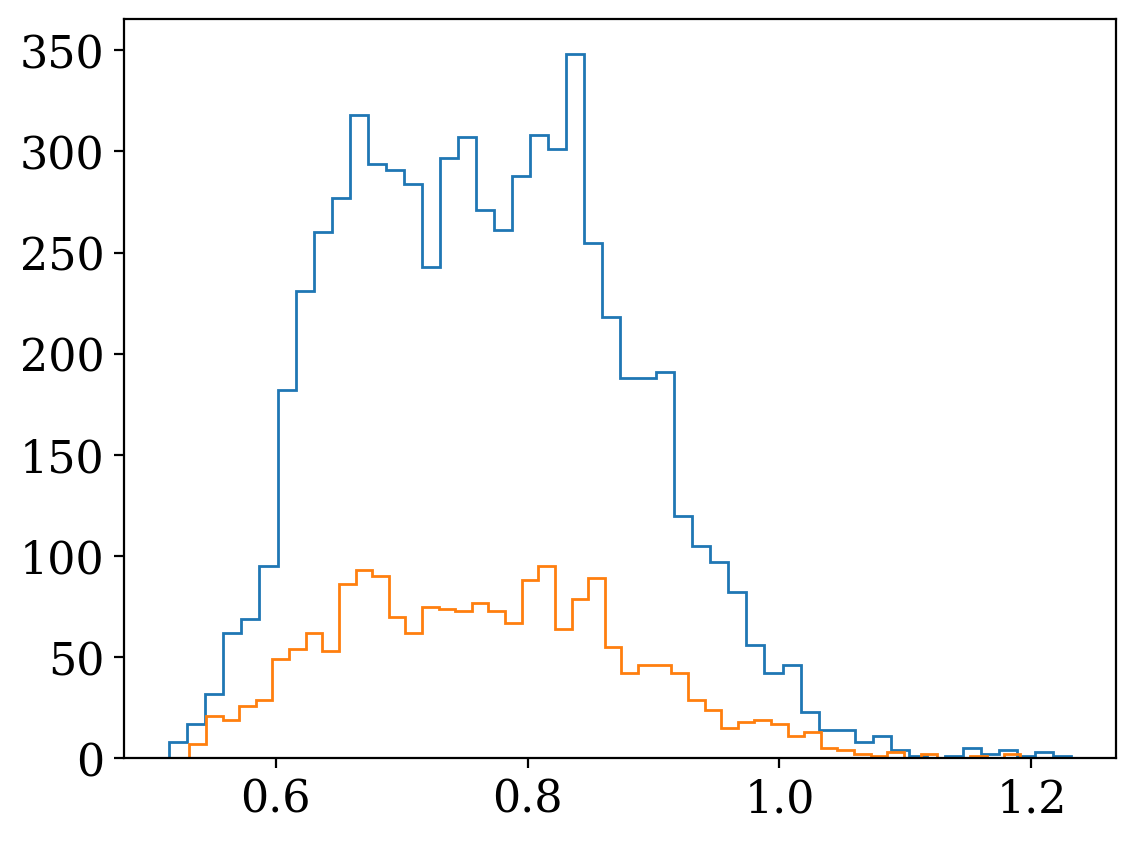

In [66]:
plt.hist(dd3["i_flux_gauss2_err"], bins=50, histtype="step")
plt.hist(dd2["i_flux_gauss2_err"], bins=50, histtype="step")

0.1756113737358728 1.4592275449440804


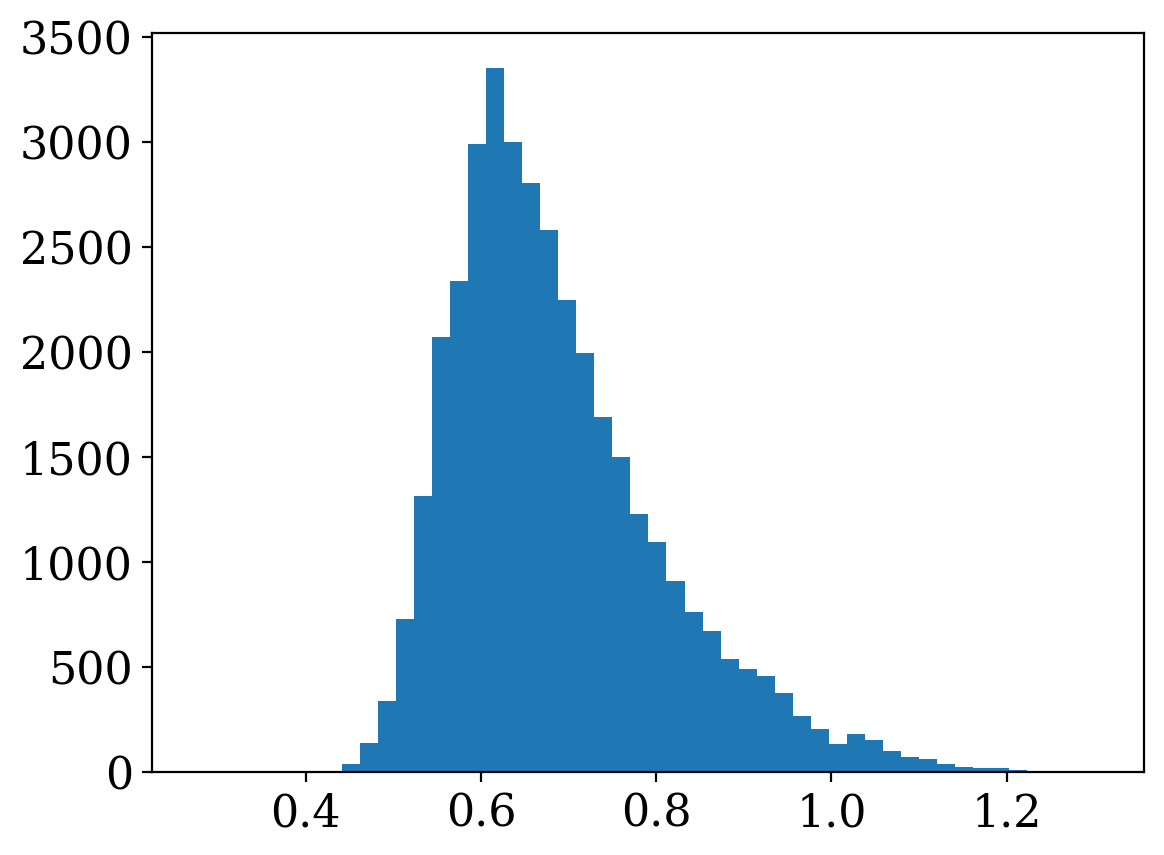

In [4]:
band = "r"
vmin = np.percentile(dd[f"{band}_flux_gauss2_err"],0.5) - 0.2
vmax = np.percentile(dd[f"{band}_flux_gauss2_err"],99.5) + 0.2
plt.hist(dd[f"{band}_flux_gauss2_err"], range=(vmin, vmax), bins=50)
print(np.min(dd[f"{band}_flux_gauss2_err"]), np.max(dd[f"{band}_flux_gauss2_err"]))

In [22]:
mask = np.ones(len(dd), dtype=bool)
for band in "grizy":
    vmin = np.percentile(dd[f"{band}_flux_gauss2_err"],0.1)
    vmax = np.percentile(dd[f"{band}_flux_gauss2_err"],99.9)
    mask =  (
        mask
        & (dd[f"{band}_flux_gauss2_err"] > vmin)
        & (dd[f"{band}_flux_gauss2_err"] < vmax)
    )
    print(vmin, vmax)

0.34966811569203443 0.7940755169577746
0.20221334381905792 1.1930316688282394
0.528539087683254 1.1621650824073297
0.9867107811380005 2.9113282391874646
2.1839963585862754 6.278050740592894


In [36]:
full = fitsio.read("/gpfs02/work/xiangchong.li/work/hsc_data/s23b/tracts_fdfc_v1_final.fits")
full2 = full[dd["index"][mask]]
full2["index"] = np.arange(len(full2)).astype(int)
fitsio.write("/gpfs02/work/xiangchong.li/work/hsc_data/s23b/tracts_fdfc_v2_final.fits", full2)

In [ ]:
#patch_id = tt[0]["patch_id"]
tract_id = 10061 #tt[0]["tract_id"]
patch_db = 207
patch_x = patch_db // 100
patch_y = patch_db % 100
patch_id = patch_x + patch_y * 9
band = "i"
image_dir = (
    "/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_calexp"
)
files = glob.glob(os.path.join(image_dir, f"{tract_id}/{patch_id}/{band}/*"))
fname = files[0]
exposure = afwImage.ExposureF.readFits(fname)

mask1 = fitsio.read(
    f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_mask_v2/{tract_id}/{patch_id}/mask.fits"
)

In [51]:
files = glob.glob(f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_nImage/{tract_id}/{patch_id}/i/*.fits")
fname = files[0]
ninput = fitsio.read(fname)

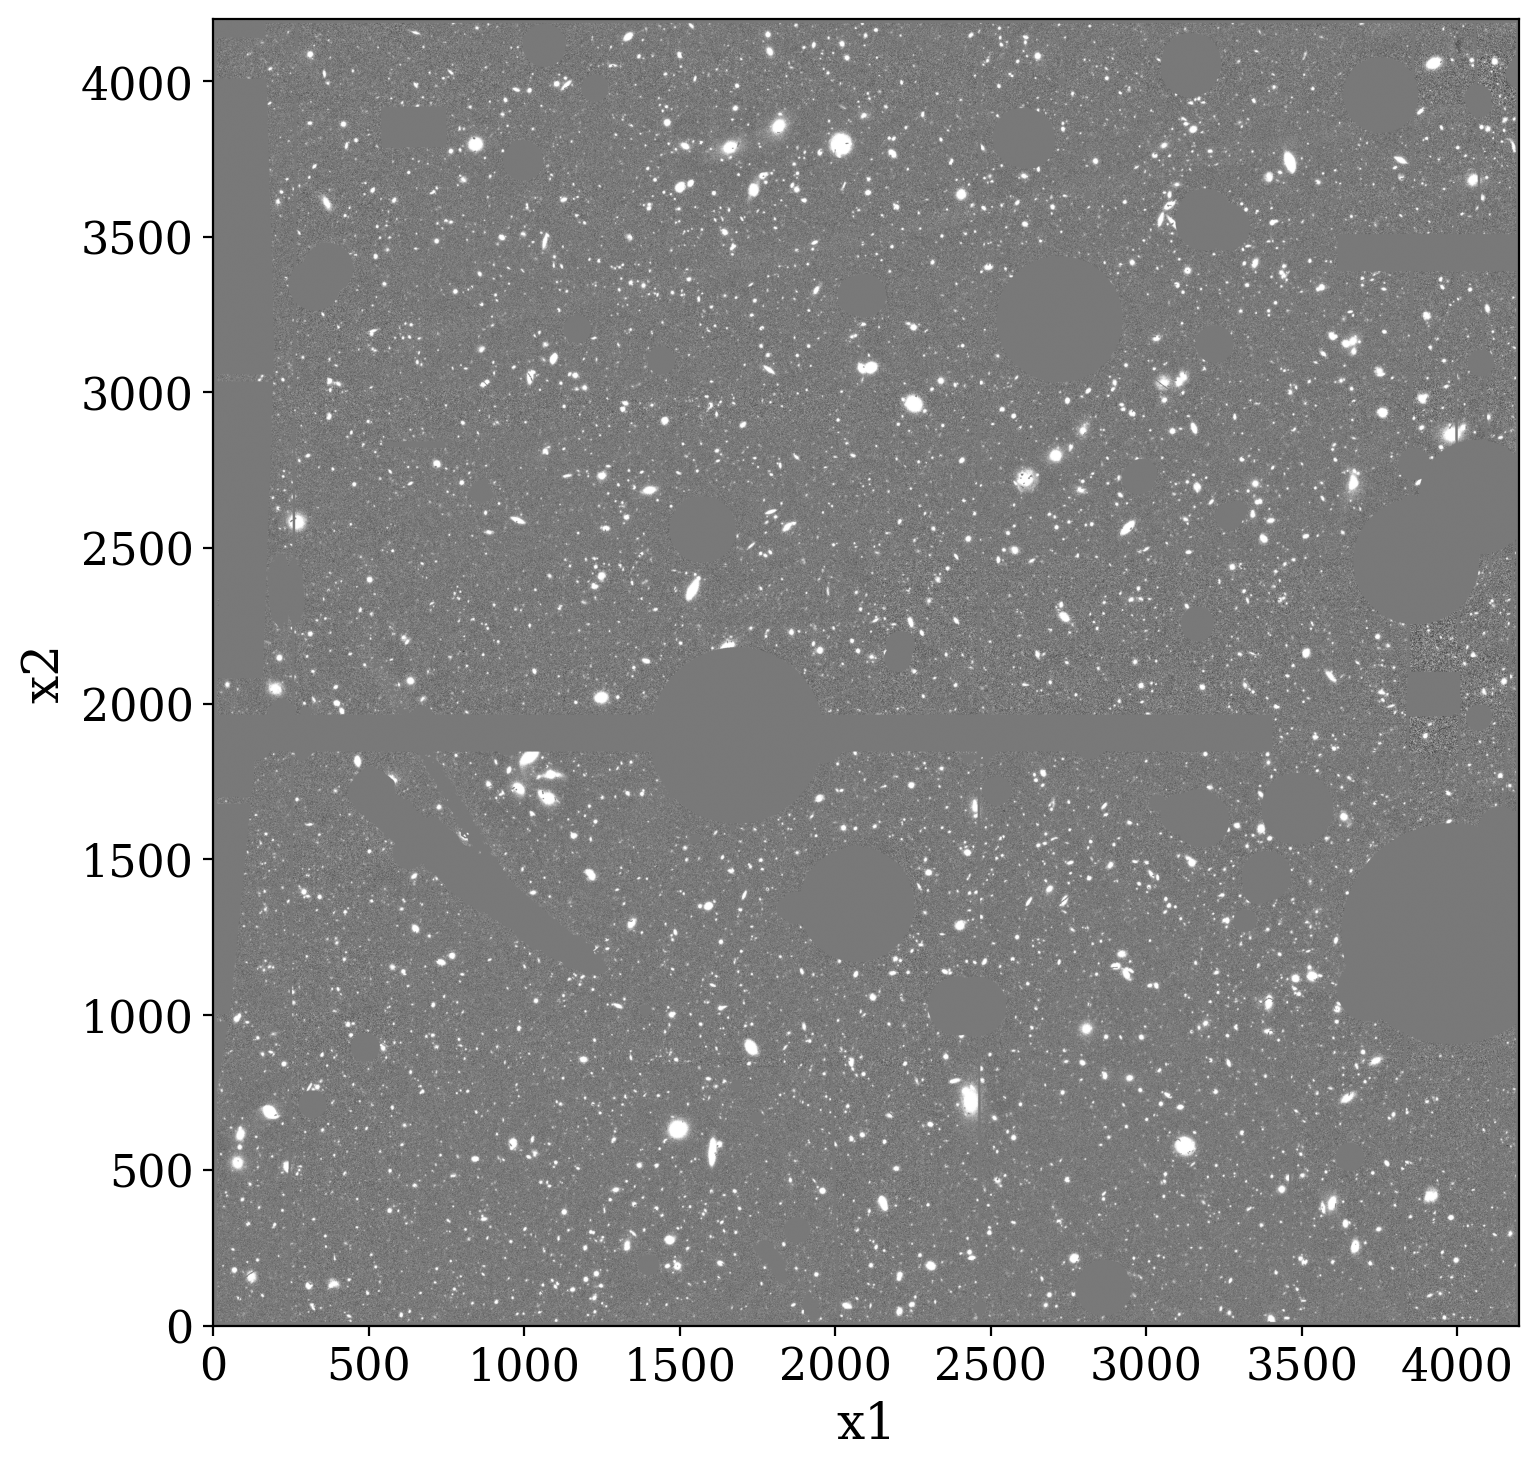

In [45]:
image = exposure.image.array * (1.0 - mask1)
# Use ZScale for a good display stretch (common in astronomy)
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(image)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)

ax.set_xlabel("x1")
ax.set_ylabel("x2")

plt.tight_layout()
plt.show()

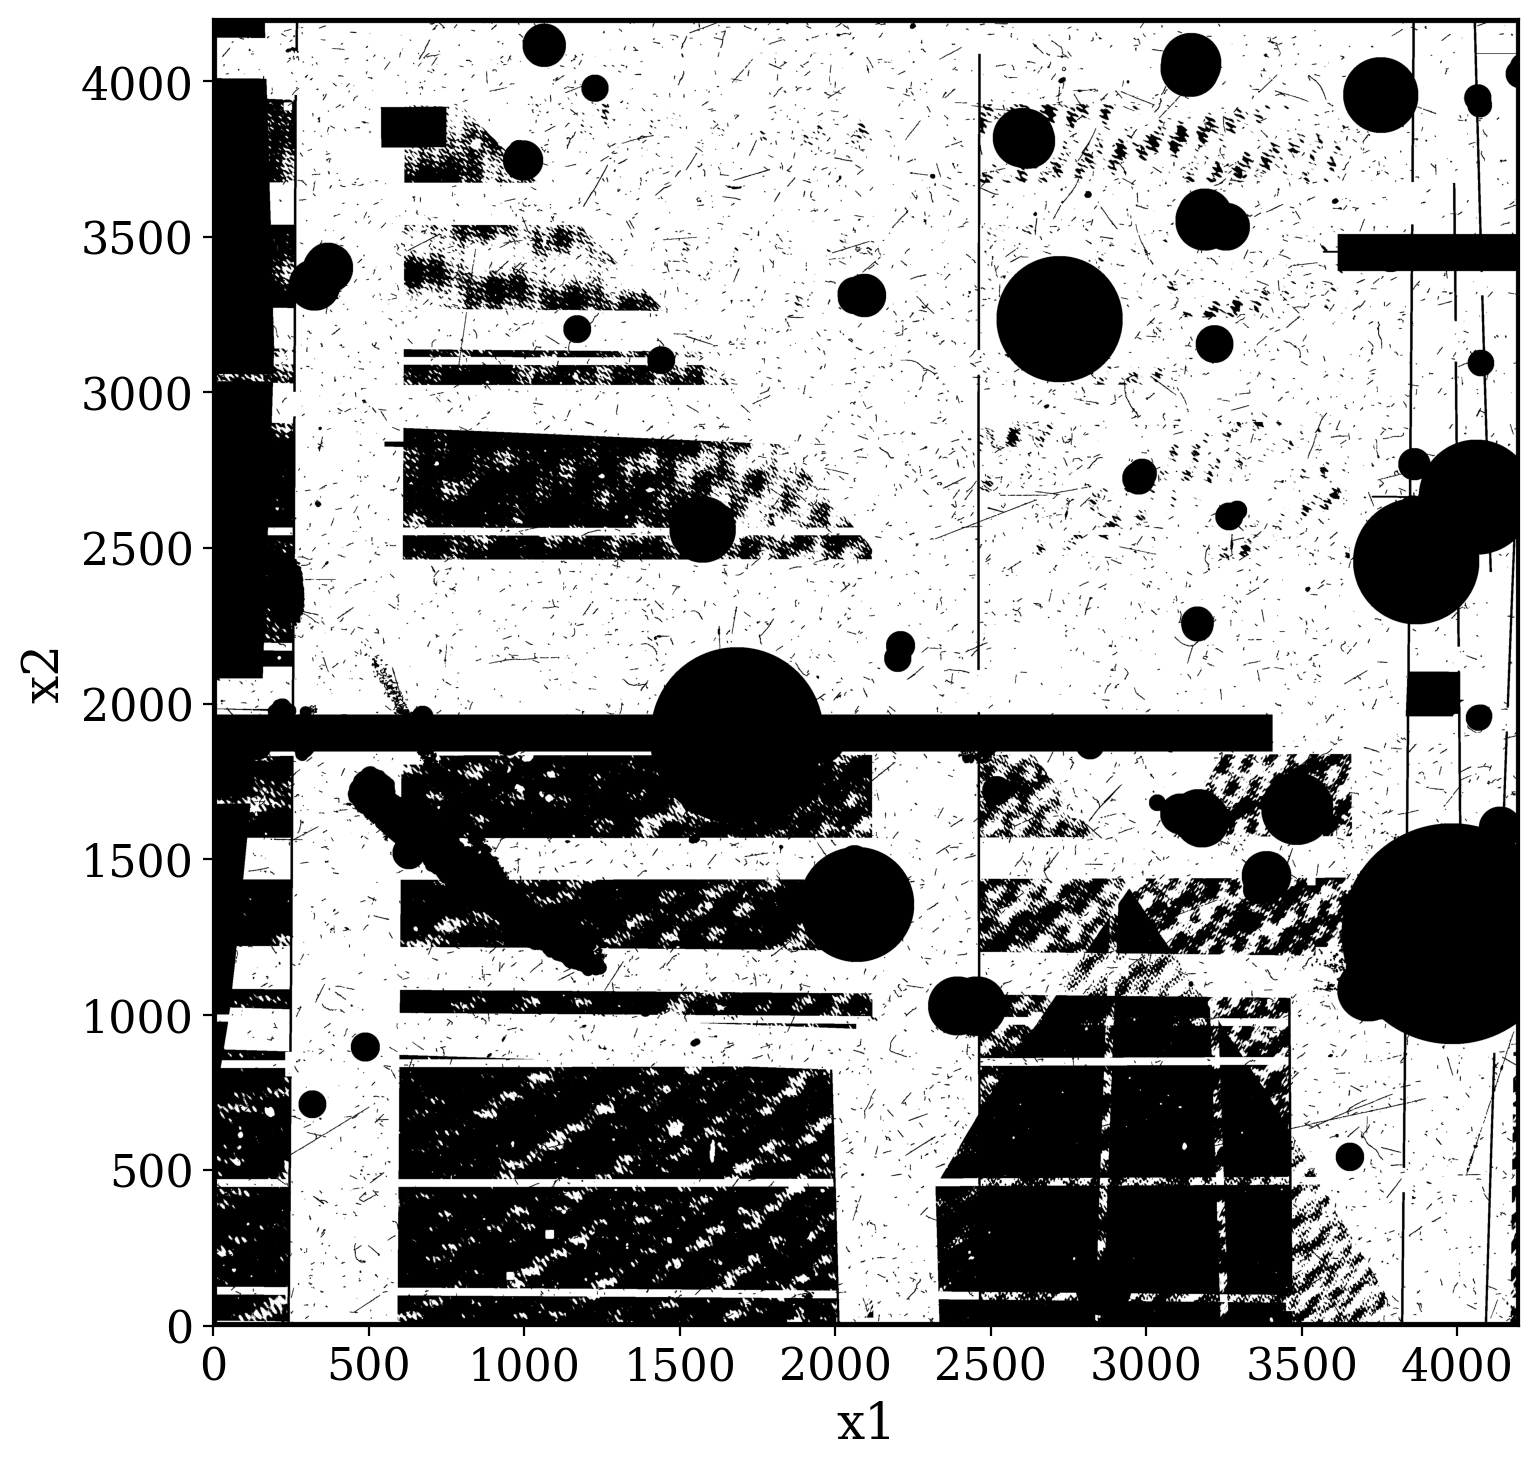

In [47]:
image = ((exposure.variance.array * (1.0 - mask1)) > 0.006).astype(int)
# Use ZScale for a good display stretch (common in astronomy)
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(image)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)

ax.set_xlabel("x1")
ax.set_ylabel("x2")

plt.tight_layout()
plt.show()

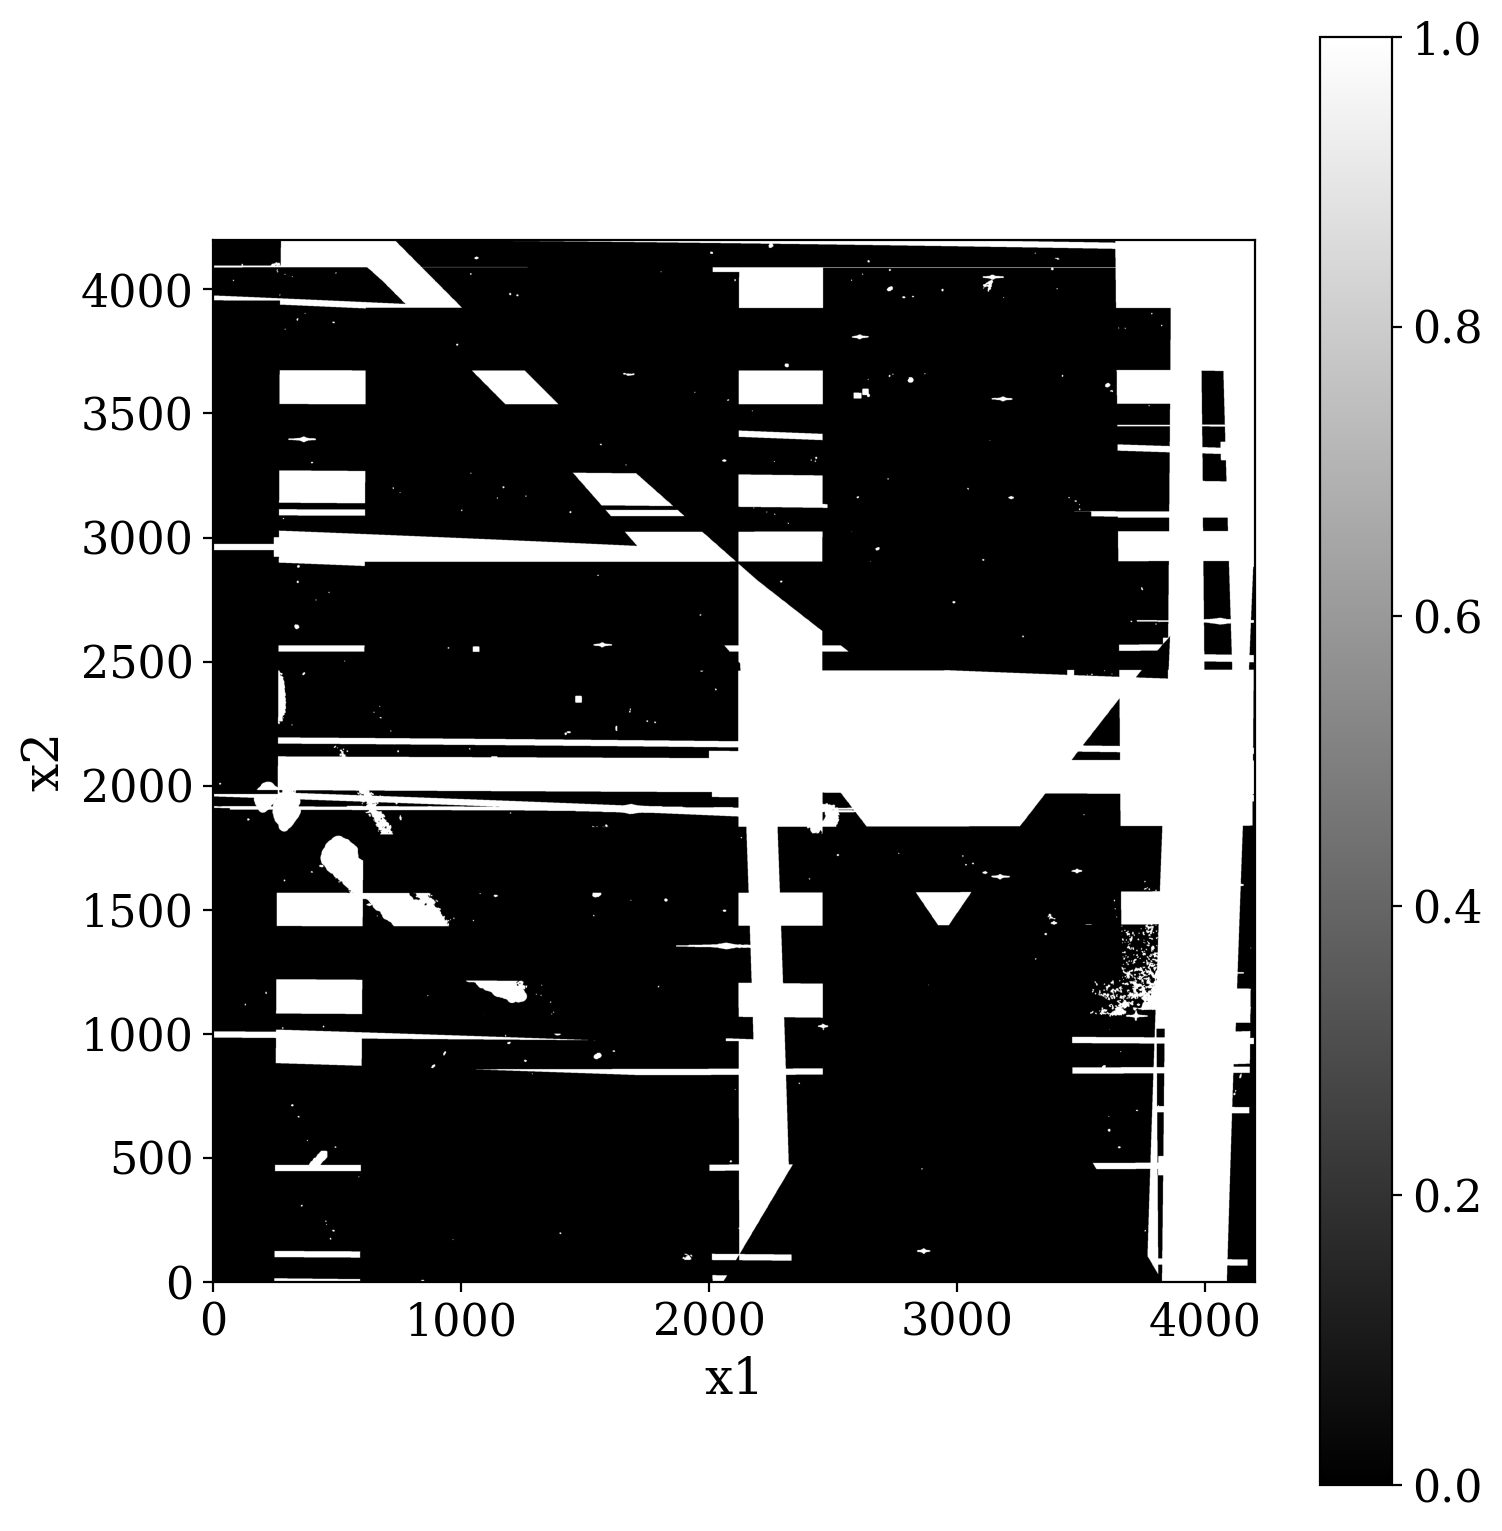

In [58]:
image = (ninput < 4).astype(int)
# Use ZScale for a good display stretch (common in astronomy)
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(image)

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(image, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)


plt.colorbar(im)
ax.set_xlabel("x1")
ax.set_ylabel("x2")

plt.tight_layout()
plt.show()

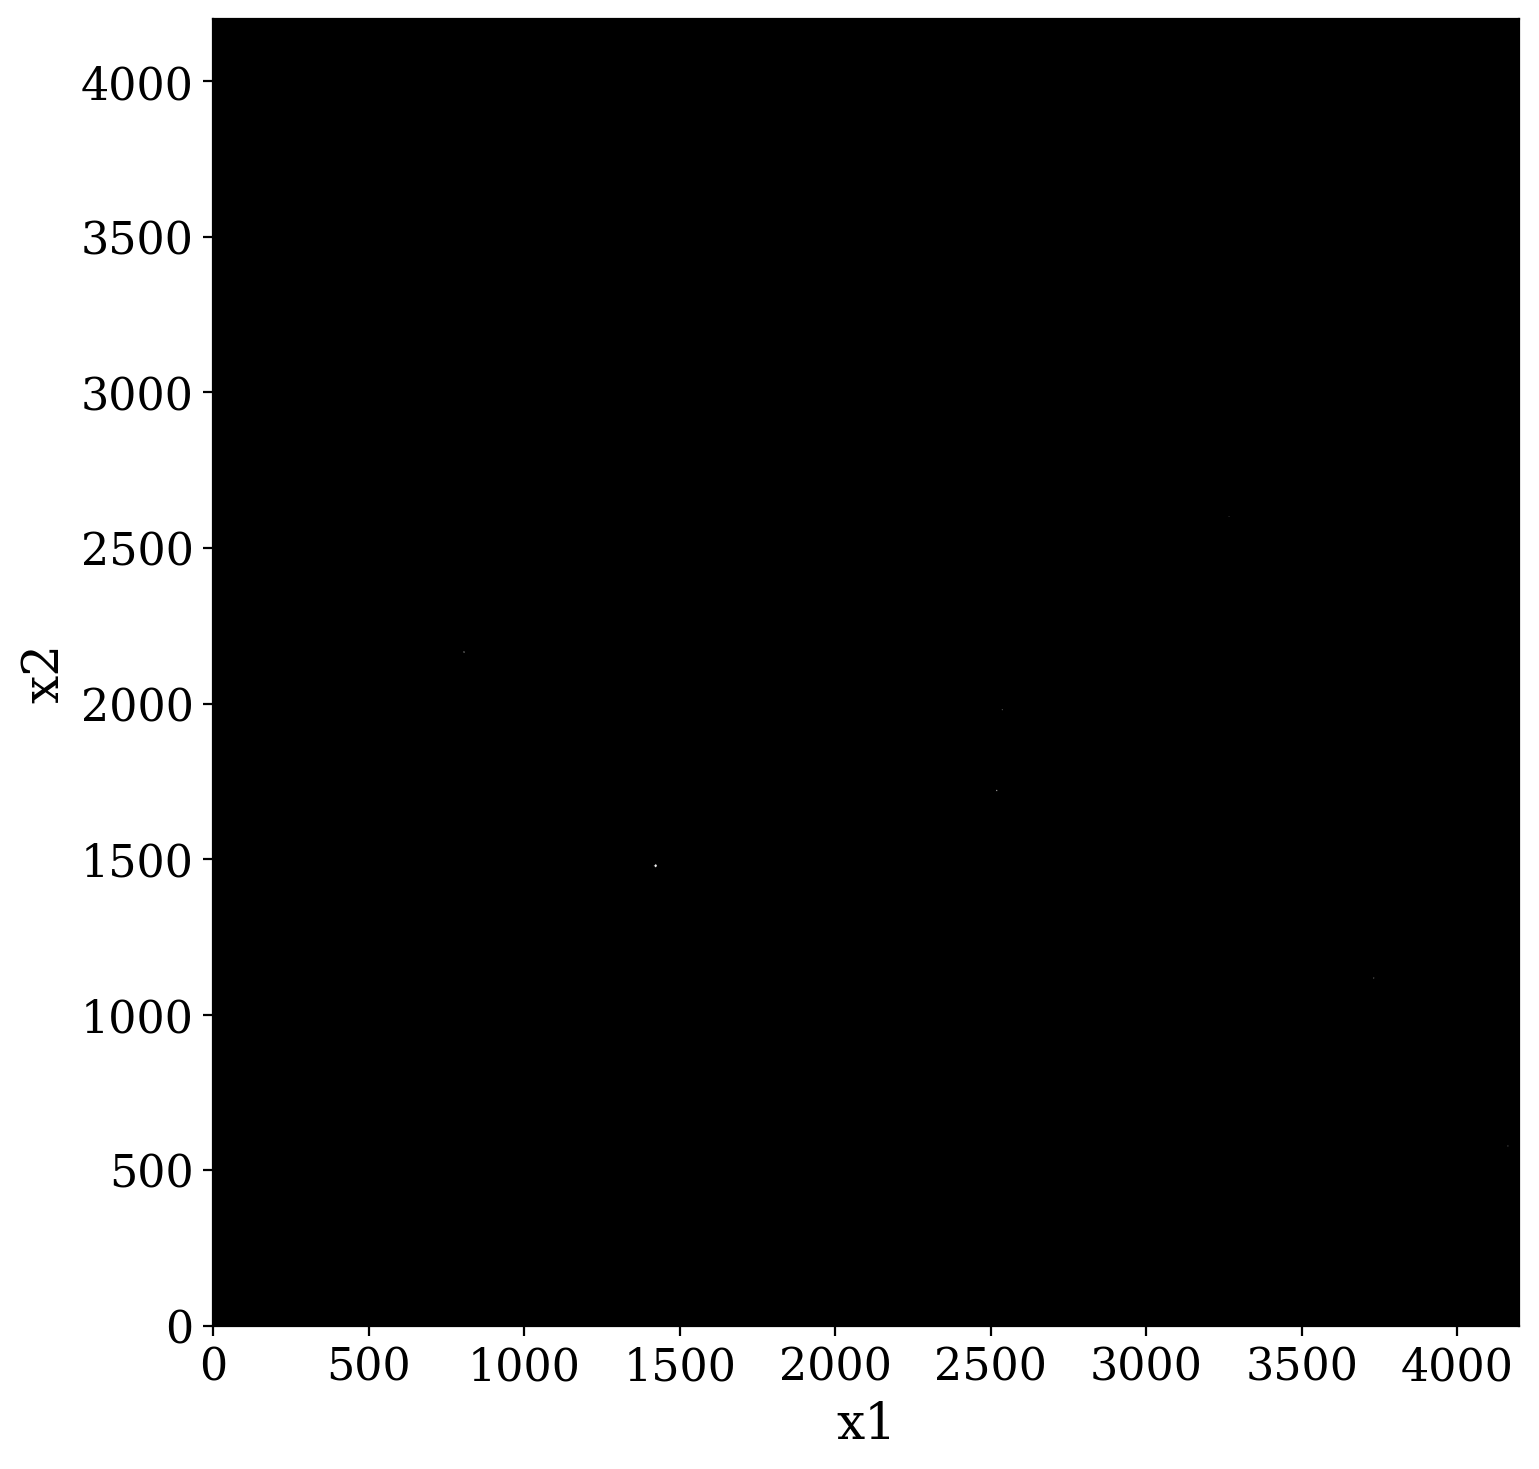

In [36]:
image = exposure.variance.array
# Use ZScale for a good display stretch (common in astronomy)
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(image)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow((image > 0.5).astype(int), origin='lower', cmap='gray')

ax.set_xlabel("x1")
ax.set_ylabel("x2")

plt.tight_layout()
plt.show()

(array([1.4400395e+07, 2.9801160e+06, 9.8657000e+04, 3.5851000e+04,
        9.6931000e+04, 2.4976000e+04, 1.2110000e+03, 4.9600000e+02,
        2.5300000e+02, 2.1500000e+02]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
 <BarContainer object of 10 artists>)

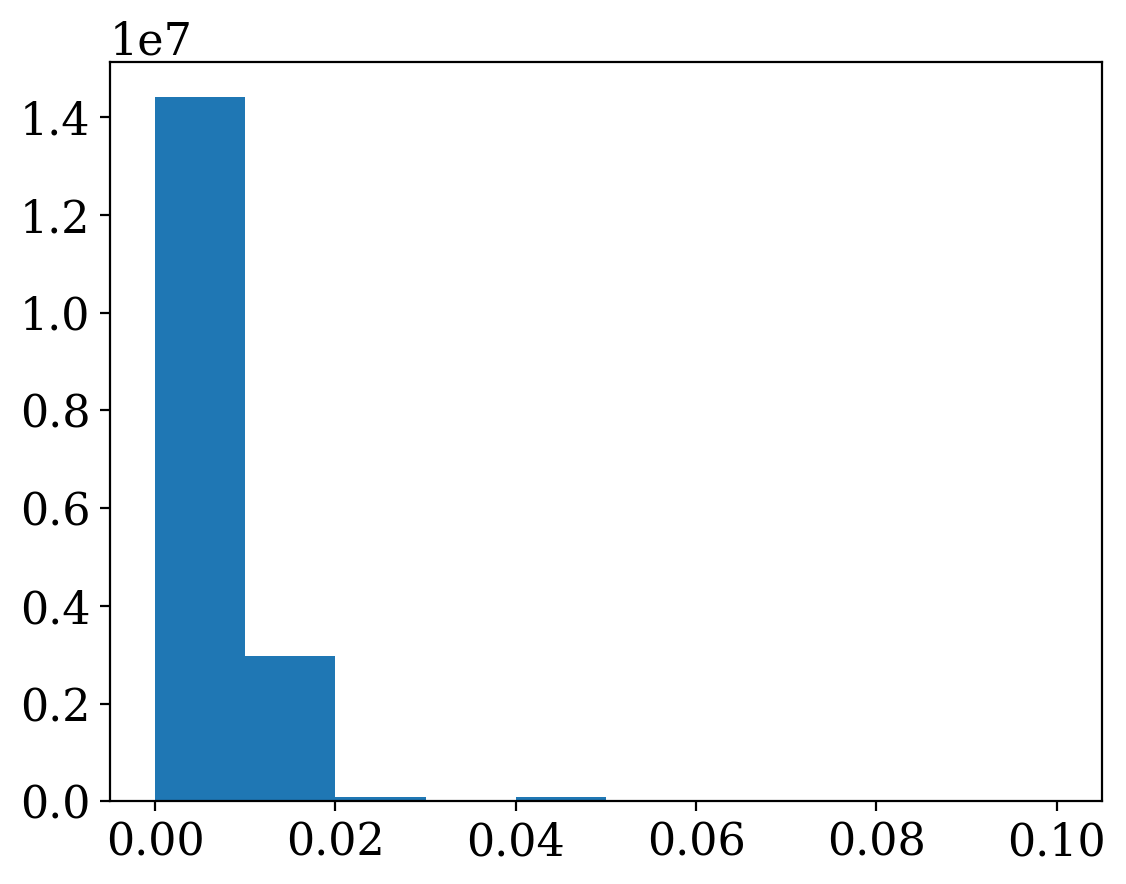

In [37]:
plt.hist(np.ravel(exposure.variance.array), range=(0, 0.1))

In [41]:
np.nanmean(exposure.variance.array[(mask1==0) & (exposure.mask.array==0)])

0.041170035

In [39]:
mm = (mask1==0) & (exposure.mask.array==0) & (exposure.variance.array < 10)

In [40]:
np.nanmedian(exposure.variance.array[mm])

0.007223998

In [44]:
np.nanmedian(exposure.variance.array[mm])

0.007223998

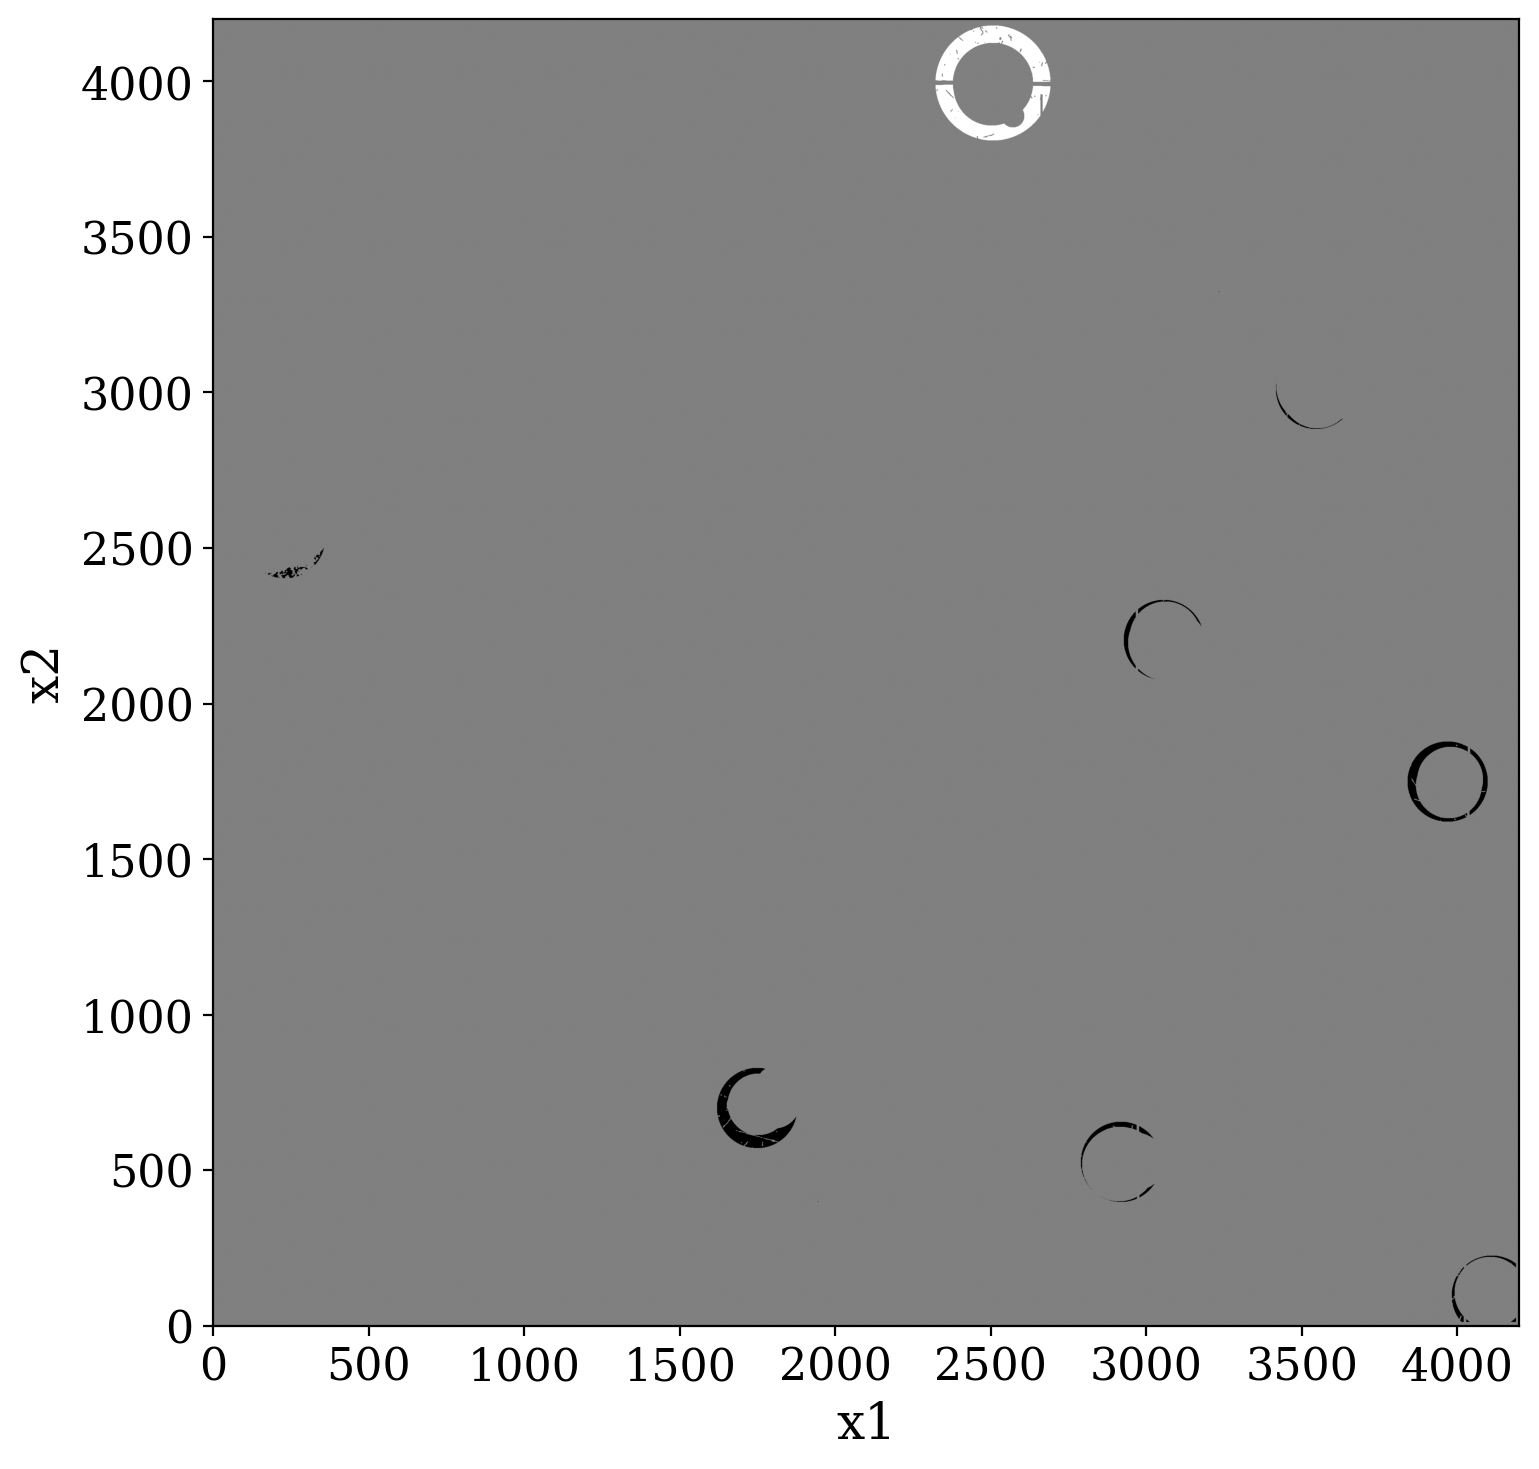

In [87]:
mask1 = fitsio.read(
    f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_mask_v2/{tract_id}/{patch_id}/mask.fits"
)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(mask, origin='lower', cmap='gray')

ax.set_xlabel("x1")
ax.set_ylabel("x2")

plt.tight_layout()
plt.show()

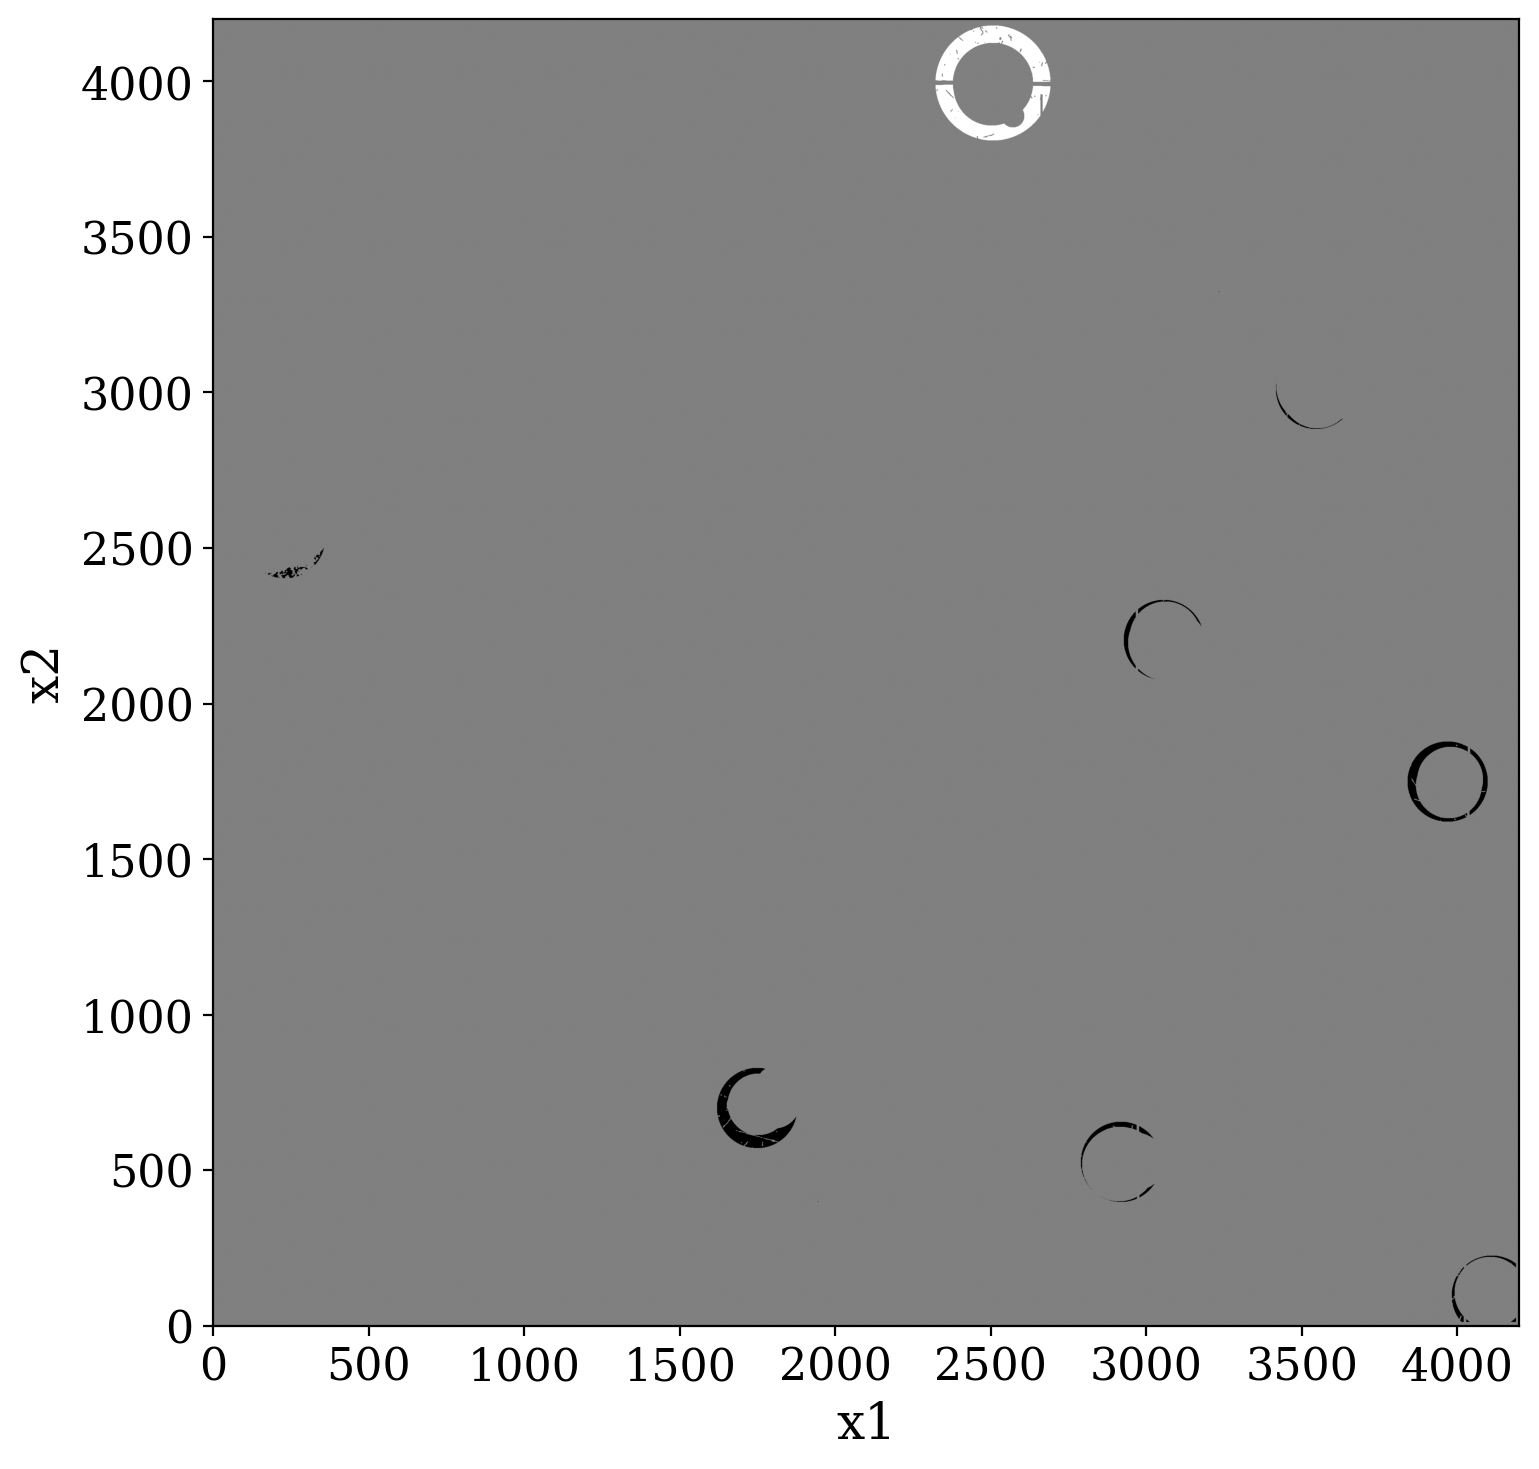

In [88]:
mask = mask1 - fitsio.read(
    f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_mask/{tract_id}/{patch_id}/mask3.fits"
)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(mask, origin='lower', cmap='gray')

ax.set_xlabel("x1")
ax.set_ylabel("x2")

plt.tight_layout()
plt.show()